In [90]:
#Glaucoma dataset from UCSD: first PCA then unsupervised (k-means) clustering
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

#Load dataset
data = pd.read_table('raw_data', sep=",")

print(data)

       peritd1  peritd2  peritd3  peritd4  peritd5  peritd6  peritd7  peritd8  \
0          -30      -28      -30      -29      -32      -32      -33      -32   
1            0        0        1        4        0        1       -1        0   
2           -4       -3       -7       -6       -2       -3       -4       -3   
3           -2        2        3        3        1       -3        0       -5   
4           -5       -4       -2        0       -2       -2       -4       -1   
5          -16       -5      -19      -23      -16       -5       -7      -16   
6          -10       -8       -6       -3       -7       -5       -6       -7   
7           -6       -2       -3        0       -3       -2       -4       -4   
8            0       -1       -5       -1       -4       -3       -4       -1   
9            0        2        2        1       -1        2       -1       -1   
10          -1        1       -2        3        0       -1       -1       -1   
11           2       -1     

In [91]:
#OK, this dataset is huge - lets use PCA to get it down to 2 orthoganal dimensions:

pca = decomposition.PCA()
pca.fit(data)

print(pca.explained_variance_)

pca.n_components = 2
X = pca.fit_transform(data)
print(X)

[ 2125.88184234   264.35099303   136.22373112    93.73999441    54.31571135
    46.37833186    34.23029012    30.95320514    26.00301368    20.21506257
    18.37438873    17.80261508    14.77449365    14.12355549    13.10152927
    11.84171018    10.83114018    10.27244766    10.01062049     9.64319548
     8.79977853     8.50727428     8.36131172     8.08596342     7.89679412
     7.49494759     7.36918512     7.25892371     6.81431626     6.61444917
     6.55717628     6.44853705     6.26078592     6.18982267     6.10335549
     5.96102219     5.70681898     5.62291894     5.47527604     5.41403219
     5.13567858     4.88757569     4.8191108      4.70299802     4.53454495
     4.46532931     4.35282221     4.31269989     4.00053353     3.89993676
     3.71371921     3.33205459]
[[-114.82952208   67.02137167]
 [  28.46435756   -5.13346786]
 [  21.50659432   11.00619906]
 ..., 
 [  -5.22313938  -18.37818019]
 [  -7.54236477   -1.05992735]
 [  -4.51214738    2.56773465]]


In [92]:
#Ok we now have it down to two dimensions with the most variance.

#Now lets cluster it:
nclusters = 4
km = KMeans(init = 'k-means++', n_clusters = nclusters)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [93]:
#Easy enough, lets graph the results

#fig = plt.figure(figsize=(8, 3))
colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#070F00']
k_means_cluster_centers = np.sort(km.cluster_centers_, axis=0)
print(k_means_cluster_centers)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

#Lets look at the cluster centers

[[ -1.28446417e+02  -1.72132793e+01]
 [ -6.88382142e+01  -3.58552797e+00]
 [ -1.33548909e+01  -8.38277756e-02]
 [  2.67999741e+01   2.98861500e+01]]


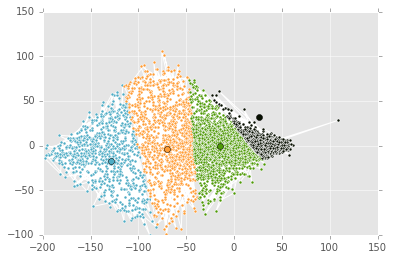

In [87]:
#Finally, lets get to the actual plotting:

%matplotlib inline
#ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(nclusters+1), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

